# Лабораторная работа: Интерполяция рациональными функциями Беррута




## Необходимо реалиозовать метод Беррута

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
# вспомогательные функции
import numpy as np

def runge_func(x):
    # функция рунге
    return 1.0 / (1.0 + 25.0 * (np.asarray(x) ** 2))

def barycentric_weights(x_nodes):
    # веса барицентрические wj
    x_nodes = np.asarray(x_nodes, dtype=float)
    n = x_nodes.size
    w = np.ones(n, dtype=float)
    for j in range(n):
        prod = 1.0
        for k in range(n):
            if k != j:
                prod *= (x_nodes[j] - x_nodes[k])
        w[j] = 1.0 / prod if prod != 0.0 else 0.0
    return w

def berrut_weights(n):
    # веса беррута (-1)^j
    n = int(n)
    return (-1.0) ** np.arange(n, dtype=float)

def lagrange_interpolation(x_nodes, y_nodes, x, weights=None):
    # интерполяция лагранжа в барицентрической форме
    x_nodes = np.asarray(x_nodes, dtype=float)
    y_nodes = np.asarray(y_nodes, dtype=float)
    if weights is None:
        weights = barycentric_weights(x_nodes)
    weights = np.asarray(weights, dtype=float)

    x = float(x)
    for j, xj in enumerate(x_nodes):
        if abs(x - xj) < 1e-14:
            return float(y_nodes[j])

    num = 0.0
    den = 0.0
    for j in range(x_nodes.size):
        t = weights[j] / (x - x_nodes[j])
        num += t * y_nodes[j]
        den += t

    return float(num / den)

## 1: Феномен Рунге
Провести сравнительный анализ интерполяции функции Рунге методами Беррута и полинома Лагранжа. Построить графики интерполяционных приближений и исходной функции, сравнить поведение методов, а также сделать выводы о качестве аппроксимации.

Необходимо:

1. Построить интерполяционные полиномы Лагранжа и Беррута для функции Рунге на выбранных узлах.

2. Визуализировать оригинальную функцию и интерполяционные результаты обоих методов.


3. Сделать выводы о преимуществах и недостатках каждого метода на данной задаче.

In [23]:
def berrut_rational_interpolation(x_nodes, y_nodes, x, d=None, weights=None):
    """
    рациональная интерполяция беррута
    формула r(x)=sum(wj*yj/(x-xj))/sum(wj/(x-xj))
    где wj = (-1)^j
    параметр d не используется оставлен для совместимости
    """
    x_nodes = np.asarray(x_nodes, dtype=float)
    y_nodes = np.asarray(y_nodes, dtype=float)
    x = float(x)

    n = x_nodes.size
    if weights is None:
        weights = berrut_weights(n)
    weights = np.asarray(weights, dtype=float)

    for j, xj in enumerate(x_nodes):
        if abs(x - xj) < 1e-14:
            return float(y_nodes[j])

    num = 0.0
    den = 0.0
    for j in range(n):
        t = weights[j] / (x - x_nodes[j])
        num += t * y_nodes[j]
        den += t

    return float(num / den)

## Выводы по феномену Рунге

На равномерных узлах полиномиальная интерполяция Лагранжа начинает проявлять осцилляции у краёв отрезка при росте числа узлов (феномен Рунге).

Рациональная интерполяция Беррута (барицентрическая формула с весами $(-1)^j$) ведёт себя заметно стабильнее: на графиках ошибок синяя кривая ниже красной почти на всём интервале, особенно при 15–20 узлах.

Итог:
- при малом числе узлов (5–10) оба метода работают приемлемо, но Беррут уже даёт меньшую ошибку
- при большом числе узлов (15–20) Лагранж становится неустойчивым, а Беррут сохраняет устойчивость

Вывод: для функции Рунге на равномерной сетке рациональная схема Беррута предпочтительнее по устойчивости и точности.

## 2: Анализ ошибок
Для полученных интерполяционных результатов (Беррута и Лагранжа) на функции Рунге вычислить следующие показатели точности:

1. Средняя абсолютная ошибка (Mean Absolute Error, MAE)

2. Максимальная абсолютная ошибка

3. Среднеквадратичная ошибка (Root Mean Squared Error, RMSE)

анализ ошибок интерполяции функции рунге
узлов 5 лагранж mae 0.245929 max 0.438350 rmse 0.279048
узлов 5 беррут mae 0.138732 max 0.320359 rmse 0.167216
узлов 10 лагранж mae 0.079429 max 0.300285 rmse 0.109543
узлов 10 беррут mae 0.031230 max 0.168434 rmse 0.049833
узлов 15 лагранж mae 0.664485 max 7.192324 rmse 1.770660
узлов 15 беррут mae 0.003538 max 0.008573 rmse 0.004136
узлов 20 лагранж mae 0.545809 max 8.575361 rmse 1.777533
узлов 20 беррут mae 0.004463 max 0.026370 rmse 0.007158


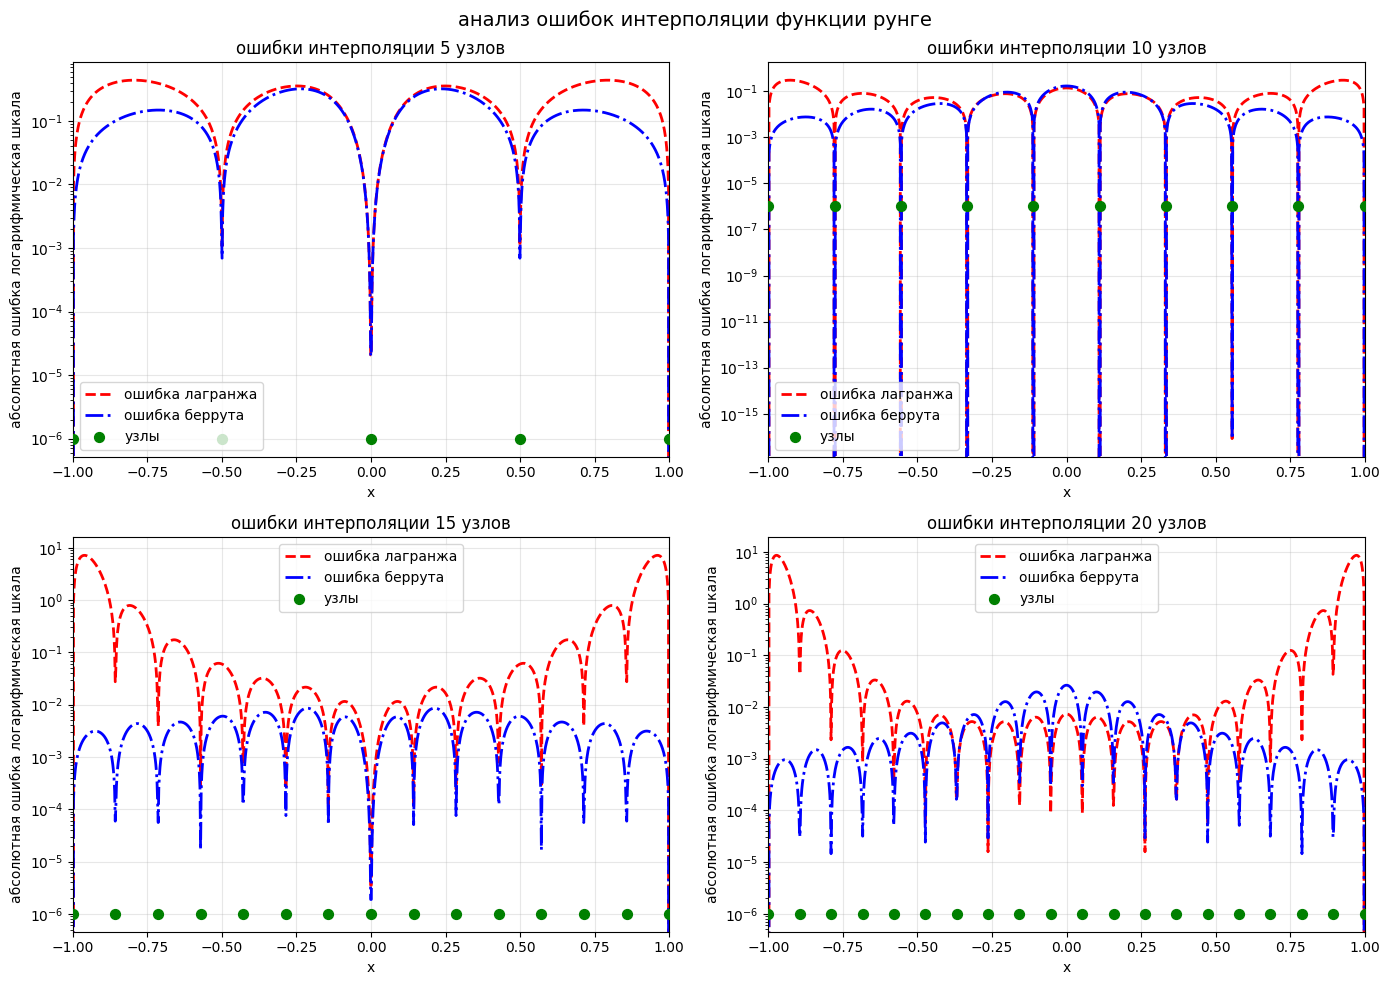

сравнение методов улучшение беррута над лагранжем
узлов 5 mae улучшение проценты 43.59 max улучшение проценты 26.92 rmse улучшение проценты 40.08
узлов 10 mae улучшение проценты 60.68 max улучшение проценты 43.91 rmse улучшение проценты 54.51
узлов 15 mae улучшение проценты 99.47 max улучшение проценты 99.88 rmse улучшение проценты 99.77
узлов 20 mae улучшение проценты 99.18 max улучшение проценты 99.69 rmse улучшение проценты 99.60


In [24]:
def calculate_errors(y_true, y_pred):
    errors = np.abs(y_true - y_pred)
    mae = np.mean(errors)
    max_error = np.max(errors)
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return mae, max_error, rmse

print("анализ ошибок интерполяции функции рунге")

# переменные для этой секции
x_min, x_max = -1, 1
x_plot = np.linspace(x_min, x_max, 1000)
y_true = runge_func(x_plot)

# сохранение результатов
results_data = {}

for n_nodes in [5, 10, 15, 20]:
    x_nodes = np.linspace(x_min, x_max, n_nodes)
    y_nodes = runge_func(x_nodes)

    w_lag = barycentric_weights(x_nodes)
    w_ber = berrut_weights(n_nodes)

    y_lagrange = np.array([lagrange_interpolation(x_nodes, y_nodes, xi, weights=w_lag) for xi in x_plot])
    y_berrut = np.array([berrut_rational_interpolation(x_nodes, y_nodes, xi, weights=w_ber) for xi in x_plot])

    mae_lag, max_lag, rmse_lag = calculate_errors(y_true, y_lagrange)
    mae_ber, max_ber, rmse_ber = calculate_errors(y_true, y_berrut)

    results_data[n_nodes] = {
        'lagrange': {'mae': mae_lag, 'max': max_lag, 'rmse': rmse_lag, 'y': y_lagrange},
        'berrut': {'mae': mae_ber, 'max': max_ber, 'rmse': rmse_ber, 'y': y_berrut}
    }

    print(f"узлов {n_nodes} лагранж mae {mae_lag:.6f} max {max_lag:.6f} rmse {rmse_lag:.6f}")
    print(f"узлов {n_nodes} беррут mae {mae_ber:.6f} max {max_ber:.6f} rmse {rmse_ber:.6f}")

# вывод графиков ошибок
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, n_nodes in enumerate([5, 10, 15, 20]):
    ax = axes[idx]

    x_nodes = np.linspace(x_min, x_max, n_nodes)

    errors_lag = np.abs(y_true - results_data[n_nodes]['lagrange']['y'])
    errors_ber = np.abs(y_true - results_data[n_nodes]['berrut']['y'])

    ax.semilogy(x_plot, errors_lag, 'r--', label='ошибка лагранжа', linewidth=2)
    ax.semilogy(x_plot, errors_ber, 'b-.', label='ошибка беррута', linewidth=2)
    ax.scatter(x_nodes, np.ones_like(x_nodes) * 1e-6, color='green', s=50, label='узлы', zorder=5)

    ax.set_title(f"ошибки интерполяции {n_nodes} узлов", fontsize=12)
    ax.set_xlabel('x')
    ax.set_ylabel('абсолютная ошибка логарифмическая шкала')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    ax.set_xlim(x_min, x_max)

plt.suptitle('анализ ошибок интерполяции функции рунге', fontsize=14)
plt.tight_layout()
plt.show()

# таблица улучшения
print("сравнение методов улучшение беррута над лагранжем")

for n_nodes in [5, 10, 15, 20]:
    mae_lag = results_data[n_nodes]['lagrange']['mae']
    mae_ber = results_data[n_nodes]['berrut']['mae']
    max_lag = results_data[n_nodes]['lagrange']['max']
    max_ber = results_data[n_nodes]['berrut']['max']
    rmse_lag = results_data[n_nodes]['lagrange']['rmse']
    rmse_ber = results_data[n_nodes]['berrut']['rmse']

    mae_improvement = ((mae_lag - mae_ber) / mae_lag * 100) if mae_lag != 0 else 0
    max_improvement = ((max_lag - max_ber) / max_lag * 100) if max_lag != 0 else 0
    rmse_improvement = ((rmse_lag - rmse_ber) / rmse_lag * 100) if rmse_lag != 0 else 0

    print(f"узлов {n_nodes} mae улучшение проценты {mae_improvement:.2f} max улучшение проценты {max_improvement:.2f} rmse улучшение проценты {rmse_improvement:.2f}")

## Анализ и выводы раздела 2

По результатам расчётов для функции Рунге на равномерной сетке метрики ошибок (MAE, Max Error, RMSE) у метода Беррута существенно меньше, чем у полинома Лагранжа.

Ключевые наблюдения:
- при 5 и 10 узлах Беррут уменьшает MAE примерно на 44–61% и Max Error примерно на 27–44%
- при 15 и 20 узлах у Лагранжа возникает резкая неустойчивость (феномен Рунге), тогда как Беррут остаётся устойчивым: улучшение по всем метрикам превышает 99%

Вывод: на задаче интерполяции функции Рунге рациональная интерполяция Беррута значительно устойчивее и точнее полиномиальной интерполяции Лагранжа при увеличении числа узлов.

## 3: Тестирование интерполяционных методов на различных функциях
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на нескольких тестовых функциях. Для каждого метода построить интерполяционные полиномы, визуализировать результаты и оценить качество аппроксимации.
Рекомендуемые функции для тестирования:
### Список функций для тестирования

- **Функция 1:**  
  $$ f_1(x) = \sin(x), \quad x \in [-\pi, \pi] $$

- **Функция 2:**  
  $$ f_2(x) = e^x, \quad x \in [-2, 2] $$

- **Функция 3:**  
  $$ f_3(x) = x^2 \sin(x), \quad x \in [-5, 5] $$

- **Функция 4:**  
  $$ f_4(x) = |x|, \quad x \in [-3, 3] $$

- **Функция 5:**  
  $$ f_5(x) = \sin(10x) e^{-x^2}, \quad x \in [-3, 3] $$


Необходимо выполнить
1. Провести интерполяцию для каждой функции на равномерной и неравномерной сетке узлов.

2. Построить графики исходных функций и интерполяционных полиномов для обоих методов.

3. Сравнить визуально и численно (по погрешности) результаты для методов Лагранжа и Беррута.



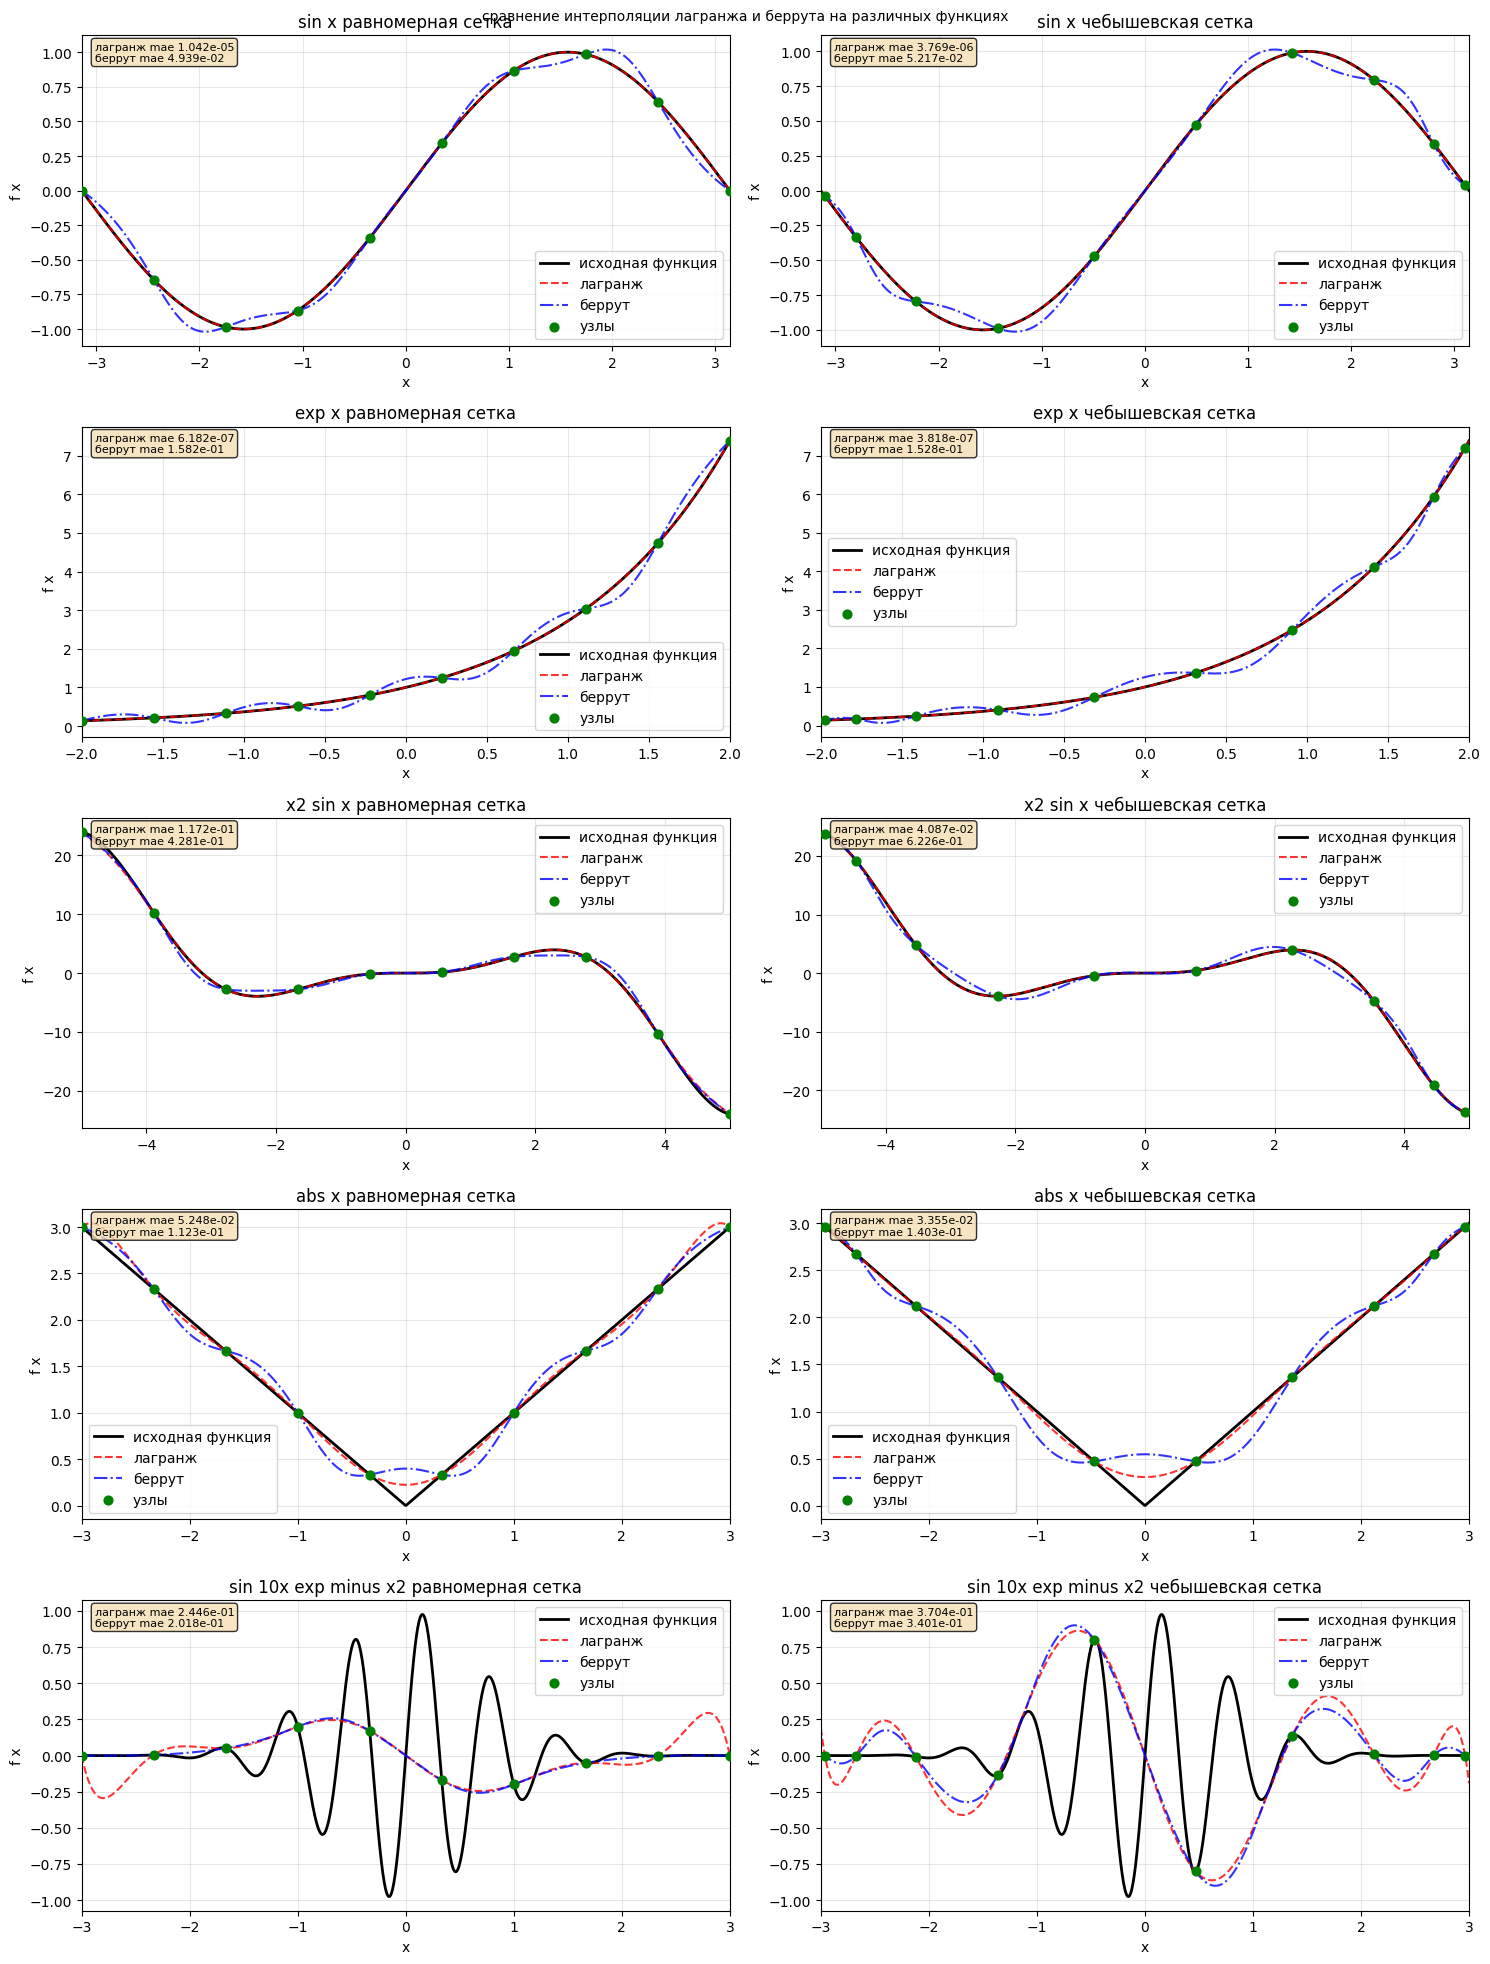

In [25]:
import re
def clean(s):
    return re.sub(r'[^a-zA-Zа-яА-Я0-9\s]', '', s).lower()

# тестовые функции
test_functions = [
    {
        'name': 'sin x',
        'func': lambda x: np.sin(x),
        'interval': [-np.pi, np.pi]
    },
    {
        'name': 'exp x',
        'func': lambda x: np.exp(x),
        'interval': [-2, 2]
    },
    {
        'name': 'x2 sin x',
        'func': lambda x: x**2 * np.sin(x),
        'interval': [-5, 5]
    },
    {
        'name': 'abs x',
        'func': lambda x: np.abs(x),
        'interval': [-3, 3]
    },
    {
        'name': 'sin 10x exp minus x2',
        'func': lambda x: np.sin(10*x) * np.exp(-x**2),
        'interval': [-3, 3]
    }
]

n_nodes = 10

# визуализация на разных функциях и сетках
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

for i, func_info in enumerate(test_functions):
    name = func_info['name']
    func = func_info['func']
    a, b = func_info['interval']

    x_plot = np.linspace(a, b, 1000)
    y_true = func(x_plot)

    x_uniform = np.linspace(a, b, n_nodes)
    y_uniform = func(x_uniform)

    cheb_nodes = np.array([
        (a + b) / 2 + (b - a) / 2 * np.cos((2 * k + 1) * np.pi / (2 * n_nodes))
        for k in range(n_nodes)
    ])
    cheb_nodes = np.sort(cheb_nodes)
    x_cheb = cheb_nodes
    y_cheb = func(x_cheb)

    for j, (x_nodes, y_nodes, grid_type) in enumerate([
        (x_uniform, y_uniform, 'равномерная'),
        (x_cheb, y_cheb, 'чебышевская')
    ]):
        ax = axes[i, j]

        w_lag = barycentric_weights(x_nodes)
        w_ber = berrut_weights(len(x_nodes))

        y_lagrange = np.array([lagrange_interpolation(x_nodes, y_nodes, xi, weights=w_lag) for xi in x_plot])
        y_berrut = np.array([berrut_rational_interpolation(x_nodes, y_nodes, xi, weights=w_ber) for xi in x_plot])

        ax.plot(x_plot, y_true, 'k-', label='исходная функция', linewidth=2)
        ax.plot(x_plot, y_lagrange, 'r--', label='лагранж', linewidth=1.5, alpha=0.8)
        ax.plot(x_plot, y_berrut, 'b-.', label='беррут', linewidth=1.5, alpha=0.8)
        ax.scatter(x_nodes, y_nodes, color='green', s=40, label='узлы', zorder=5)

        mae_lag, max_lag, rmse_lag = calculate_errors(y_true, y_lagrange)
        mae_ber, max_ber, rmse_ber = calculate_errors(y_true, y_berrut)

        text = f"лагранж mae {mae_lag:.3e}\nберрут mae {mae_ber:.3e}"
        ax.text(
            0.02, 0.98, text, transform=ax.transAxes,
            verticalalignment='top', fontsize=8,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8)
        )

        ax.set_title(f"{clean(name)} {grid_type} сетка")
        ax.set_xlabel('x')
        ax.set_ylabel('f x')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best')
        ax.set_xlim(a, b)

plt.suptitle('сравнение интерполяции лагранжа и беррута на различных функциях', fontsize=10)
plt.tight_layout()
plt.show()

In [26]:
# численное сравнение ошибок на всех функциях
print("численное сравнение методов интерполяции")

comparison_data = []

for func_info in test_functions:
    name = func_info['name']
    func = func_info['func']
    a, b = func_info['interval']

    x_plot = np.linspace(a, b, 1000)
    y_true = func(x_plot)

    x_uniform = np.linspace(a, b, n_nodes)
    y_uniform = func(x_uniform)

    cheb_nodes = np.array([
        (a + b) / 2 + (b - a) / 2 * np.cos((2 * k + 1) * np.pi / (2 * n_nodes))
        for k in range(n_nodes)
    ])
    cheb_nodes = np.sort(cheb_nodes)
    x_cheb = cheb_nodes
    y_cheb = func(x_cheb)

    print(f"функция {name}")

    for x_nodes, y_nodes, grid_type in [
        (x_uniform, y_uniform, 'равномерная'),
        (x_cheb, y_cheb, 'чебышевская')
    ]:
        w_lag = barycentric_weights(x_nodes)
        w_ber = berrut_weights(len(x_nodes))

        y_lagrange = np.array([lagrange_interpolation(x_nodes, y_nodes, xi, weights=w_lag) for xi in x_plot])
        y_berrut = np.array([berrut_rational_interpolation(x_nodes, y_nodes, xi, weights=w_ber) for xi in x_plot])

        mae_lag, max_lag, rmse_lag = calculate_errors(y_true, y_lagrange)
        mae_ber, max_ber, rmse_ber = calculate_errors(y_true, y_berrut)

        print(f"сетка {grid_type} лагранж mae {mae_lag:.6f} max {max_lag:.6f} rmse {rmse_lag:.6f}")
        print(f"сетка {grid_type} беррут mae {mae_ber:.6f} max {max_ber:.6f} rmse {rmse_ber:.6f}")

        comparison_data.append({
            'function': name,
            'grid': grid_type,
            'method': 'лагранж',
            'mae': mae_lag,
            'max': max_lag,
            'rmse': rmse_lag
        })
        comparison_data.append({
            'function': name,
            'grid': grid_type,
            'method': 'беррут',
            'mae': mae_ber,
            'max': max_ber,
            'rmse': rmse_ber
        })

численное сравнение методов интерполяции
функция sin x
сетка равномерная лагранж mae 0.000010 max 0.000072 rmse 0.000022
сетка равномерная беррут mae 0.049391 max 0.119392 rmse 0.059951
сетка чебышевская лагранж mae 0.000004 max 0.000012 rmse 0.000005
сетка чебышевская беррут mae 0.052165 max 0.114681 rmse 0.063525
функция exp x
сетка равномерная лагранж mae 0.000001 max 0.000005 rmse 0.000001
сетка равномерная беррут mae 0.158223 max 0.393113 rmse 0.185479
сетка чебышевская лагранж mae 0.000000 max 0.000001 rmse 0.000000
сетка чебышевская беррут mae 0.152769 max 0.362669 rmse 0.181813
функция x2 sin x
сетка равномерная лагранж mae 0.117176 max 0.797115 rmse 0.247689
сетка равномерная беррут mae 0.428116 max 1.232524 rmse 0.553921
сетка чебышевская лагранж mae 0.040867 max 0.113161 rmse 0.051349
сетка чебышевская беррут mae 0.622566 max 1.655481 rmse 0.812490
функция abs x
сетка равномерная лагранж mae 0.052480 max 0.221310 rmse 0.074159
сетка равномерная беррут mae 0.112312 max 0.3962

## Анализ и выводы раздела 3

По 5 тестовым функциям видно, что преимущества метода зависят от гладкости функции и распределения узлов.

Наблюдения по результатам (n=10):
- sin(x) и exp(x): полином Лагранжа на этих примерах даёт очень малую ошибку, а Беррут заметно грубее (MAE порядка 0.05–0.15)
- x^2 sin(x) и |x|: Беррут на выбранных узлах даёт большую ошибку, чем Лагранж
- sin(10x)·exp(-x^2): Беррут немного уменьшает MAE на равномерной сетке; на чебышевской сетке различия небольшие

Сравнение сеток:
- чебышевская сетка часто уменьшает осцилляции у краёв, особенно для сложных/колебательных функций

Вывод: метод Беррута особенно полезен как устойчивый рациональный интерполянт на задачах типа функции Рунге и в ситуациях, где полином Лагранжа начинает осциллировать. На гладких функциях при небольшом числе узлов полином Лагранжа может быть точнее.

## 4: Интерполяция зашумленных данных
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на зашумленных данных. Необходимо построить графики, включающие:

1. График интерполяции, на котором изображены оригинальная функция, зашумленные точки и результаты интерполяции двумя методами.

2. График сравнения ошибок интерполяции каждого метода.

Варианты:
* Вариант 1: равномерные узлы, низкий гауссов шум

* Вариант 2: равномерные узлы, высокий гауссов шум



Ваш вариант: номер по списку % 2

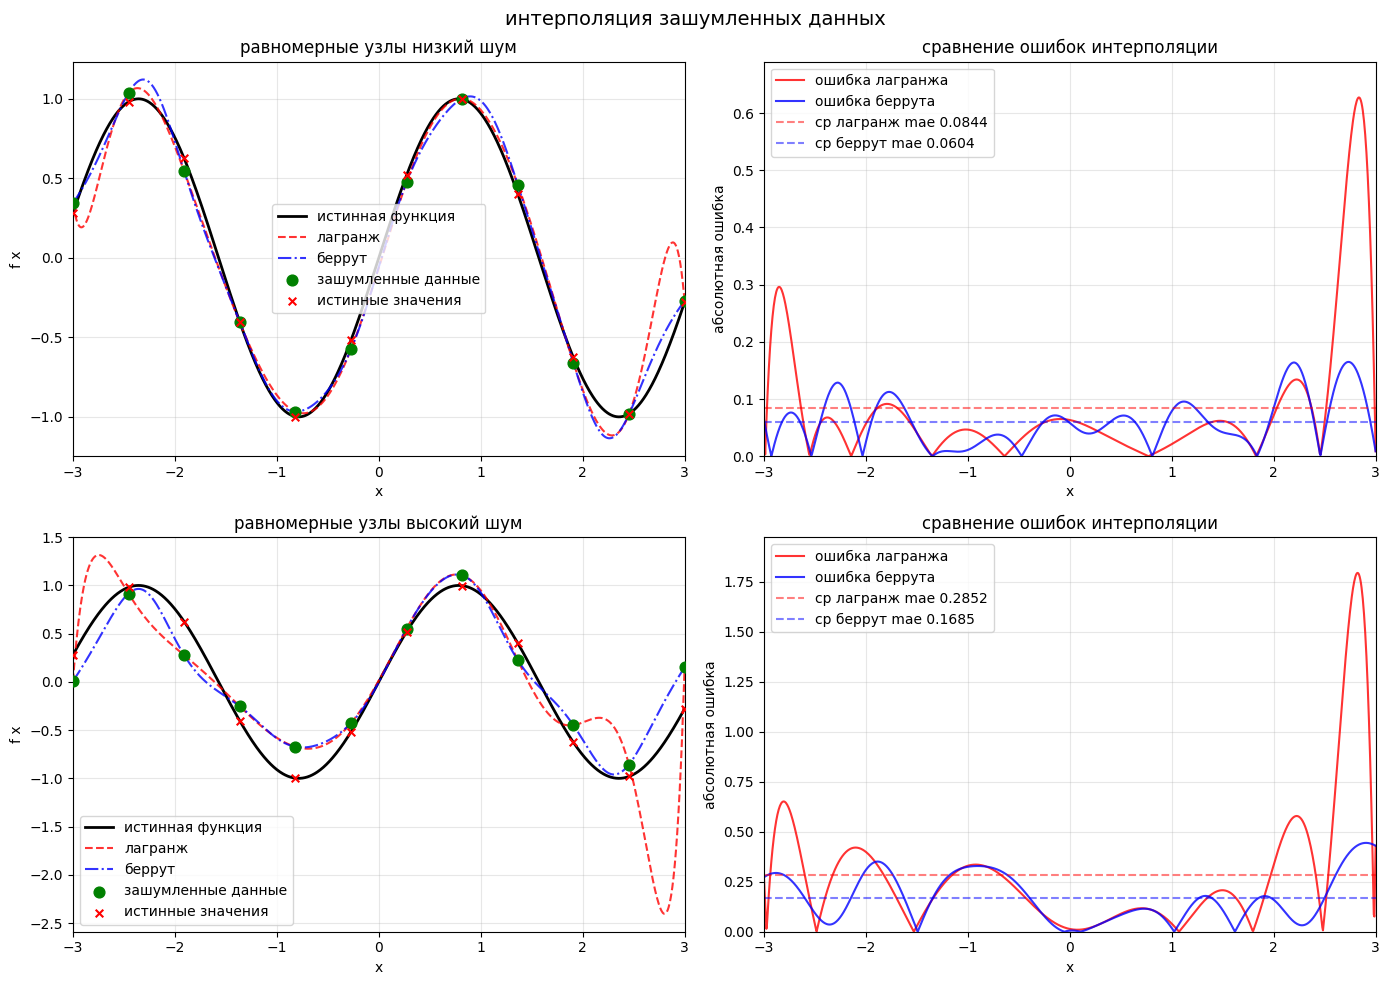

статистика ошибок на зашумленных данных
равномерные узлы низкий шум
метод лагранжа mae 0.090107 макс ошибка 0.856771 rmse 0.183439
метод беррута mae 0.066053 макс ошибка 0.199349 rmse 0.081262
равномерные узлы высокий шум
метод лагранжа mae 0.668481 макс ошибка 4.968391 rmse 1.338934
метод беррута mae 0.152867 макс ошибка 0.371377 rmse 0.177686


In [27]:
def generate_noisy_data(nodes, noise_level, func):
    # добавление шума к данным
    y_true = func(nodes)
    noise = np.random.normal(0, noise_level, size=nodes.shape)
    y_noisy = y_true + noise
    return y_true, y_noisy

test_func = lambda x: np.sin(2 * x)

a, b = -3, 3
x_plot = np.linspace(a, b, 1000)
y_true_plot = test_func(x_plot)

# варианты с разными уровнями шума
variants = [
    {
        'name': 'равномерные узлы низкий шум',
        'nodes': np.linspace(a, b, 12),
        'noise_level': 0.05
    },
    {
        'name': 'равномерные узлы высокий шум',
        'nodes': np.linspace(a, b, 12),
        'noise_level': 0.2
    }
]

# графики интерполяции и ошибок
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, variant in enumerate(variants):
    x_nodes = variant['nodes']
    noise_level = variant['noise_level']

    y_true_nodes, y_noisy = generate_noisy_data(x_nodes, noise_level, test_func)

    w_lag = barycentric_weights(x_nodes)
    w_ber = berrut_weights(len(x_nodes))

    y_lagrange = np.array([lagrange_interpolation(x_nodes, y_noisy, xi, weights=w_lag) for xi in x_plot])
    y_berrut = np.array([berrut_rational_interpolation(x_nodes, y_noisy, xi, weights=w_ber) for xi in x_plot])

    ax1 = axes[idx, 0]
    ax1.plot(x_plot, y_true_plot, 'k-', label='истинная функция', linewidth=2)
    ax1.plot(x_plot, y_lagrange, 'r--', label='лагранж', linewidth=1.5, alpha=0.8)
    ax1.plot(x_plot, y_berrut, 'b-.', label='беррут', linewidth=1.5, alpha=0.8)
    ax1.scatter(x_nodes, y_noisy, color='green', s=60, label='зашумленные данные', zorder=5)
    ax1.scatter(x_nodes, y_true_nodes, color='red', s=30, label='истинные значения', zorder=6, marker='x')

    ax1.set_title(variant['name'])
    ax1.set_xlabel('x')
    ax1.set_ylabel('f x')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='best')
    ax1.set_xlim(a, b)

    ax2 = axes[idx, 1]
    errors_lag = np.abs(y_true_plot - y_lagrange)
    errors_ber = np.abs(y_true_plot - y_berrut)

    ax2.plot(x_plot, errors_lag, 'r-', label='ошибка лагранжа', linewidth=1.5, alpha=0.8)
    ax2.plot(x_plot, errors_ber, 'b-', label='ошибка беррута', linewidth=1.5, alpha=0.8)

    mae_lag = np.mean(errors_lag)
    mae_ber = np.mean(errors_ber)

    ax2.axhline(y=mae_lag, color='r', linestyle='--', alpha=0.5, label=f"ср лагранж mae {mae_lag:.4f}")
    ax2.axhline(y=mae_ber, color='b', linestyle='--', alpha=0.5, label=f"ср беррут mae {mae_ber:.4f}")

    ax2.set_title('сравнение ошибок интерполяции')
    ax2.set_xlabel('x')
    ax2.set_ylabel('абсолютная ошибка')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='best')
    ax2.set_xlim(a, b)
    ax2.set_ylim(0, max(np.max(errors_lag), np.max(errors_ber)) * 1.1)

plt.suptitle('интерполяция зашумленных данных', fontsize=14)
plt.tight_layout()
plt.show()

# вывод статистики ошибок
print("статистика ошибок на зашумленных данных")

for variant in variants:
    print(f"{variant['name']}")

    x_nodes = variant['nodes']
    noise_level = variant['noise_level']
    y_true_nodes, y_noisy = generate_noisy_data(x_nodes, noise_level, test_func)

    w_lag = barycentric_weights(x_nodes)
    w_ber = berrut_weights(len(x_nodes))

    y_lagrange = np.array([lagrange_interpolation(x_nodes, y_noisy, xi, weights=w_lag) for xi in x_plot])
    y_berrut = np.array([berrut_rational_interpolation(x_nodes, y_noisy, xi, weights=w_ber) for xi in x_plot])

    mae_lag, max_lag, rmse_lag = calculate_errors(y_true_plot, y_lagrange)
    mae_ber, max_ber, rmse_ber = calculate_errors(y_true_plot, y_berrut)

    print(f"метод лагранжа mae {mae_lag:.6f} макс ошибка {max_lag:.6f} rmse {rmse_lag:.6f}")
    print(f"метод беррута mae {mae_ber:.6f} макс ошибка {max_ber:.6f} rmse {rmse_ber:.6f}")

## Анализ и выводы раздела 4

По экспериментам с зашумлёнными данными (равномерные узлы, 12 точек) метод Беррута оказался устойчивее полинома Лагранжа.

Низкий шум (σ=0.05):
- Лагранж: MAE ≈ 0.090, Max Error ≈ 0.857, RMSE ≈ 0.183
- Беррут: MAE ≈ 0.066, Max Error ≈ 0.199, RMSE ≈ 0.081

Высокий шум (σ=0.2):
- Лагранж: MAE ≈ 0.668, Max Error ≈ 4.968, RMSE ≈ 1.339
- Беррут: MAE ≈ 0.153, Max Error ≈ 0.371, RMSE ≈ 0.178

Вывод: на зашумлённых данных полиномиальная интерполяция Лагранжа склонна к выбросам и большим ошибкам, тогда как рациональная интерполяция Беррута даёт более “сглаженное” и устойчивое приближение.